## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import warnings
import pickle

C:\Users\Bhujith10\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Bhujith10\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Bhujith10\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Bhujith10\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

#### Show Top 5 Records

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [45]:
X = df.drop(columns=['math score'],axis=1)

In [37]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [10]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [46]:
y = df['math score']

In [39]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [47]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

#numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [48]:
X = preprocessor.fit_transform(X)

In [16]:
X.shape

(1000, 19)

In [49]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [18]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3241
- Mean Absolute Error: 4.2674
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3966
- Mean Absolute Error: 4.2170
- R2 Score: 0.8803


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7055
- Mean Absolute Error: 4.5122
- R2 Score: 0.8556
-----------------------

### Results

In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880319
6,XGBRegressor,0.871412
8,AdaBoost Regressor,0.853359
5,Random Forest Regressor,0.851939
7,CatBoosting Regressor,0.848881
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783193
4,Decision Tree,0.744677


## Linear Regression

In [50]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.03


## Plot y_pred and y_test

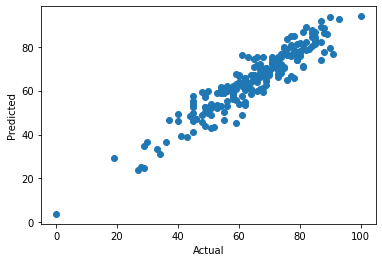

In [51]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

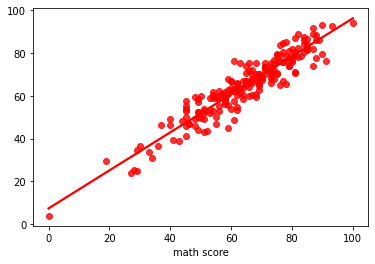

In [23]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [24]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.523438,14.476562
737,53,58.914062,-5.914062
740,80,76.929688,3.070312
660,74,76.750000,-2.750000
411,84,87.554688,-3.554688
...,...,...,...
408,52,43.523438,8.476562
332,62,62.054688,-0.054688
208,74,67.945312,6.054688
613,65,67.148438,-2.148438


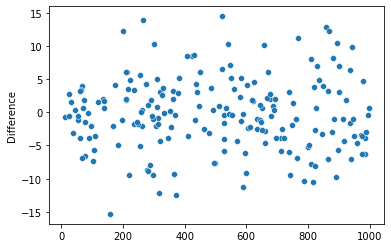

In [25]:
sns.scatterplot(pred_df['Difference'])

In [26]:
lin_model.coef_

array([ 6.44774306e+13,  6.44774306e+13, -4.04931877e+13, -4.04931877e+13,
       -4.04931877e+13, -4.04931877e+13, -4.04931877e+13,  1.30684395e+13,
        1.30684395e+13,  1.30684395e+13,  1.30684395e+13,  1.30684395e+13,
        1.30684395e+13, -1.31854169e+11, -1.31854169e+11,  1.09408486e+13,
        1.09408486e+13,  3.44531250e+00,  1.10078125e+01])

In [33]:
X.shape

(1000, 19)

In [52]:
X.select_dtypes()

AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

In [76]:
x = df.drop(['math score'],axis=1)
y = df['math score']

## Train Test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=41)

## Pre-processing
categorical_columns = list(x.select_dtypes(include='object').columns)
numerical_columns = list(x.select_dtypes(exclude='object').columns)

ohe = OneHotEncoder()
sc = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", ohe, categorical_columns),
         ("StandardScaler", numeric_transformer, numerical_columns),        
    ]
)

x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.transform(x_test)

## Linear Regression model
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(x_train_transformed, y_train)
predictions = linear_model.predict(x_test_transformed)
print('RMSE on test set',np.sqrt(mean_squared_error(y_test,predictions)))

## Converting the model to pickle file
pickle.dump(linear_model, open('model.pkl','wb'))
pickle.dump(preprocessor, open('preprocessor.pkl','wb'))

RMSE on test set 5.417987750807826


In [80]:
test_df = x_test.reset_index().drop('index',axis=1)
test_df.to_csv('testing.csv',index=False)

In [73]:
preprocessor_loaded = pickle.load(open('preprocessor.pkl','rb'))

In [82]:
a = pd.read_csv('testing.csv')

5.417987750807826

In [10]:
import sys
from src.logger import logging

def error_message_detail(error, error_detail:sys):
    _,_,exc_tb = error_detail.exc_info()
    file_name = exc_tb.tb_frame.f_code.co_filename
    error_message = 'Error occurred in Python Script file [{0}] line number [{1}] error message [{2}]'.format(file_name, exc_tb.tb_lineno,str(error))
    return error_message


class CustomException(Exception):
    def __init__(self, error_message, error_detail:sys):
        super().__init__(error_message)
        self.error_message=error_message_detail(error_message,error_detail=error_detail)

    def __str__(self):
        return self.error_message

In [11]:
try:
    b = 10/0
except Exception as e:
    raise CustomException(e,sys)

(<class 'ZeroDivisionError'>, ZeroDivisionError('division by zero'), <traceback object at 0x00000242FDDCED88>)


CustomException: Error occurred in Python Script file [<ipython-input-11-82a2794c678d>] line number [2] error message [division by zero]